In [1]:
# import stuff
#General
import importlib

#My Code
import io_manager as io
import plot_aggregates
from pars_shocks import Pars
import my_toolbox as tb
import tables
import main
import numpy as np
import model_uncert as model
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from matplotlib.figure import Figure
from matplotlib.axes import Axes
import pars_shocks as ps

import time
import main
import importlib
importlib.reload(main)

importlib.reload(tb)

of_name = None
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
path_50p = main_path + "input/50p_age_moms/"
trans_path = main_path + "input/50p_age_moms/MH_trans_by_MH_clust_age.csv"
trans_path_bench = trans_path
main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
do_phi_H_calib = True
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, 
                                                                    H_trans_path = trans_path, do_phi_H_calib = do_phi_H_calib)

# trans_path = main_path + "input/MH_trans/" # this is still here so that some of the legacy code below still runs, but it is confusing. 
myPars = myPars_bench

*****Running main_io with default out_folder_name*****
Using health transition matrix from: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_by_MH_clust_age.csv
Solver ran in 6.468583899999885 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 9.4541645, w0_sd_targ = 3.2013602, 
                                        w1_targ = 0.3406973883314617, w2_targ = 0.3031905120658842, wH_targ = 0.035280712, phi_H_target = 0.0519771
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 *****
***** Calibration iteration 9 *****
***** Calibration iteration 10 *****
***** Calibration iteration 11 *****
***** Calibration iteration 12 *****
***** Ca

In [2]:
outpath = main_path + "/output/table_maker/"

dis_trans_path = trans_path
trans_name = "MH_trans_by_MH_clust_age"
myPars.H_trans = io.read_and_shape_H_trans_full(myPars, dis_trans_path)
plot_aggregates.plot_H_trans_H_type(myPars, outpath, trans_name) 


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Age', ylabel='Probability (%)'>)

In [3]:
trans_name = "MH_trans_uncond_age"
dis_trans_path = path_50p + trans_name + ".csv" 
my_trans = io.read_and_shape_H_trans_uncond_age(myPars, dis_trans_path)
# print(my_trans)
myPars.H_trans = my_trans
# print(myPars.H_trans)
plot_aggregates.plot_H_trans_uncond(myPars, outpath, trans_name) 

In [4]:
trans_name = "MH_trans_uncond"
dis_trans_path = path_50p + trans_name + ".csv" 
myPars.H_trans = io.read_and_shape_H_trans_uncond(myPars, dis_trans_path)
trans= myPars.H_trans[0,0,:,:]
tables.print_H_trans_to_tex(myPars, trans, outpath, trans_name)


PDF successfully created at C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert//output/table_maker/MH_trans_uncond.pdf


In [5]:
import main
import calibration as calib
import pars_shocks as ps
import importlib
import plot_lc
importlib.reload(main)
importlib.reload(calib)
importlib.reload(plot_lc)

trans_path = trans_path_bench
print(f"trans_path: {trans_path}")

# of_name = None
# main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
# path_50p = main_path + "input/50p_age_moms/"
# trans_path = main_path + "input/50p_age_moms/MH_trans_by_MH_clust_age.csv"
# trans_path_bench = trans_path
# main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
# myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path, do_phi_H_calib=True)

# # trans_path = main_path + "input/MH_trans/" # this is still here so that some of the legacy code below still runs, but it is confusing. 
# myPars = myPars_bench

of_name = None
myPars_bench, myShocks_bench, sols_bench, sims_bench = main.main_io(main_path, out_folder_name = of_name, 
                                                                    H_trans_path = trans_path, output_flag = True)

myPars_no_cost = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_cost.phi_H = 0.0
myPars_no_cost, myShocks_no_cost, sols_no_cost, sims_no_cost = main.main_io(main_path, out_folder_name = of_name, 
                                                                            H_trans_path = trans_path,
                                                                            myPars = myPars_no_cost, myShocks=myShocks_bench, 
                                                                            output_flag = False, do_phi_H_calib = False)

myPars_no_wH = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_wH.wH_coeff = 0.0
myPars_no_wH, myShocks_no_wH, sols_no_wH, sims_no_wH = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_no_wH, myShocks=myShocks_bench, 
                                                                    output_flag = False, do_wH_calib = False)

myPars_all_high_H_types = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_all_high_H_types.H_type_perm_weights = np.array([1.0, 0.0])
(myPars_all_high_H_types, myShocks_all_high_H_types, 
    sols_all_high_H_types, sims_all_high_H_types) = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_all_high_H_types, myShocks=myShocks_bench, 
                                                                                                    output_flag = False)

myPars_no_MH = main.pars_factory(main_path, H_trans_path = trans_path)
myPars_no_MH.phi_H = 0.0
myPars_no_MH.wH_coeff = 0.0
myPars_no_MH, myShocks_no_MH, sols_no_MH, sims_no_MH = main.main_io(main_path, out_folder_name = of_name, H_trans_path = trans_path,
                                                                    myPars = myPars_no_MH, myShocks=myShocks_bench,
                                                                    output_flag = False, do_wH_calib = False, do_phi_H_calib = False)


print("myPars_bench")
print(f"phi_H: {myPars_bench.phi_H}, wH_coeff: {myPars_bench.wH_coeff}, H_type_perm_weights: {myPars_bench.H_type_perm_weights}")
print("myPars_no_cost")
print(f"phi_H: {myPars_no_cost.phi_H}, wH_coeff: {myPars_no_cost.wH_coeff}, H_type_perm_weights: {myPars_no_cost.H_type_perm_weights}")
print("myPars_no_wH")
print(f"phi_H: {myPars_no_wH.phi_H}, wH_coeff: {myPars_no_wH.wH_coeff}, H_type_perm_weights: {myPars_no_wH.H_type_perm_weights}")
print("myPars_all_high_H_types")
print(f"phi_H: {myPars_all_high_H_types.phi_H}, wH_coeff: {myPars_all_high_H_types.wH_coeff}, H_type_perm_weights: {myPars_all_high_H_types.H_type_perm_weights}")
print("myPars_no_MH")
print(f"phi_H: {myPars_no_MH.phi_H}, wH_coeff: {myPars_no_MH.wH_coeff}, H_type_perm_weights: {myPars_no_MH.H_type_perm_weights}")



trans_path: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_by_MH_clust_age.csv
*****Running main_io with default out_folder_name*****
Using health transition matrix from: C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/input/50p_age_moms/MH_trans_by_MH_clust_age.csv
Solver ran in 0.4471364999999423 seconds
Calibrating with alpha_lab_targ = 0.33496439, w0_mean_targ = 9.4541645, w0_sd_targ = 3.2013602, 
                                        w1_targ = 0.3406973883314617, w2_targ = 0.3031905120658842, wH_targ = 0.035280712, phi_H_target = 0.0519771
***** Calibration iteration 0 *****
***** Calibration iteration 1 *****
***** Calibration iteration 2 *****
***** Calibration iteration 3 *****
***** Calibration iteration 4 *****
***** Calibration iteration 5 *****
***** Calibration iteration 6 *****
***** Calibration iteration 7 *****
***** Calibration iteration 8 ****

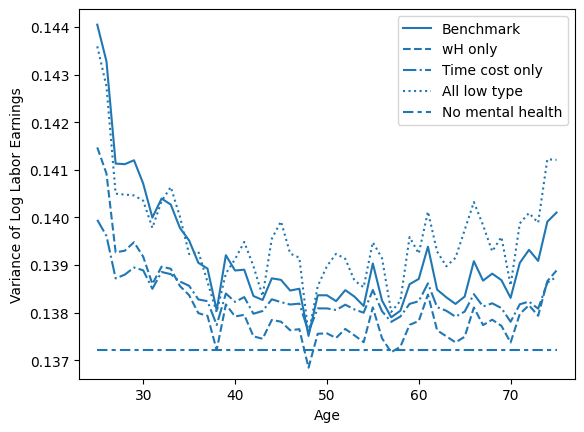

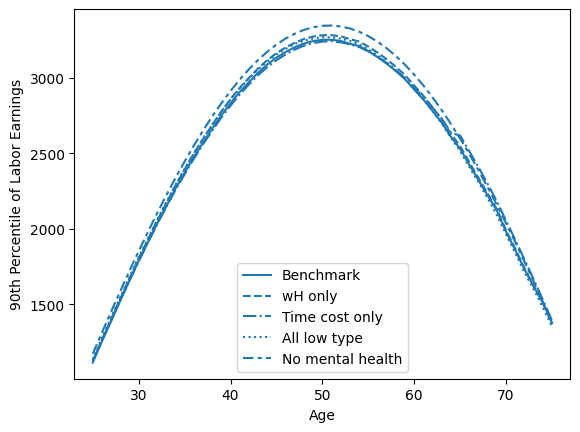

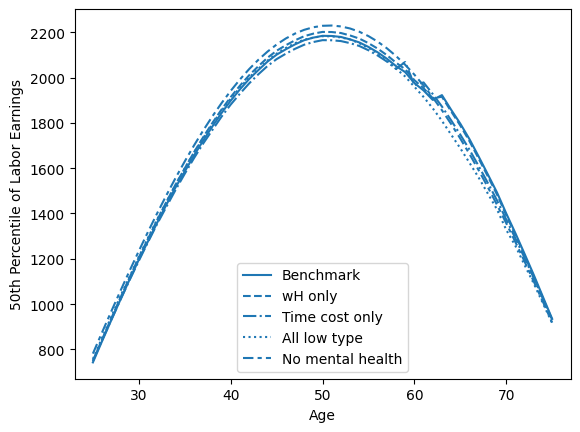

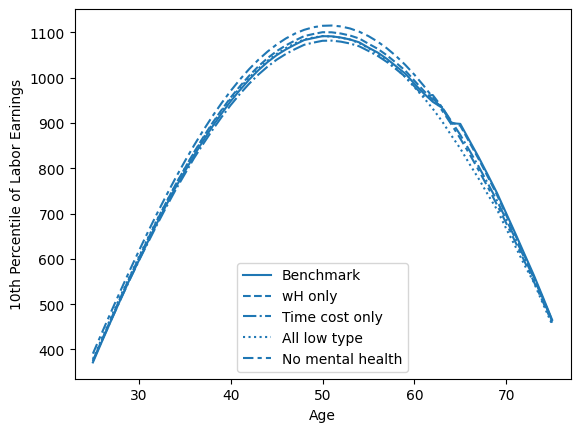

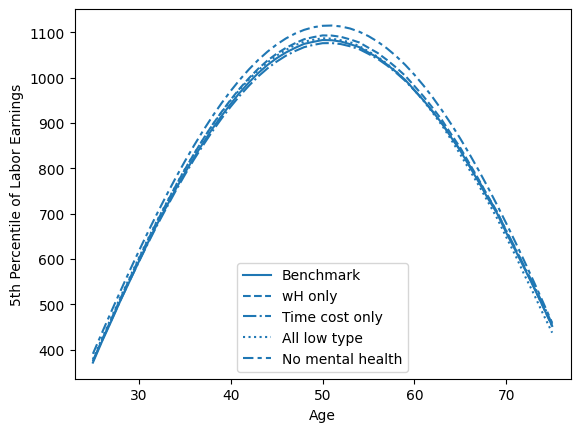

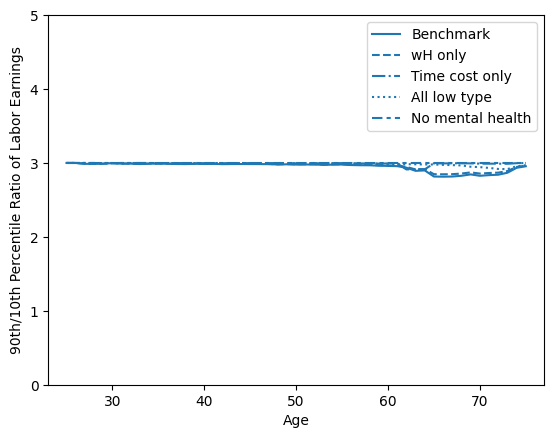

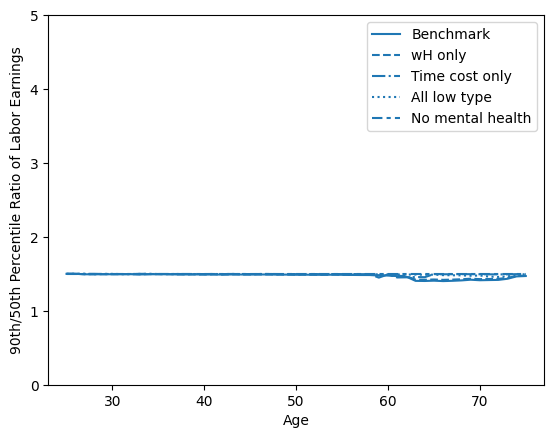

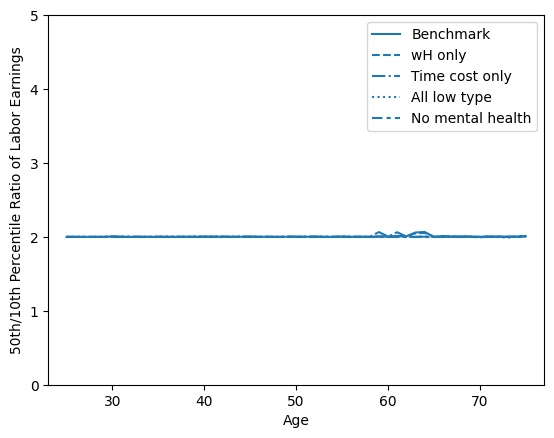

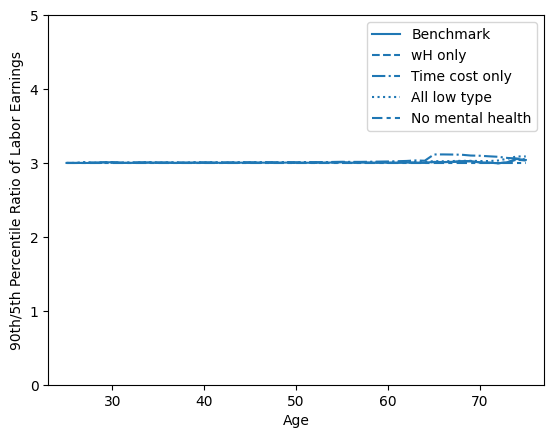

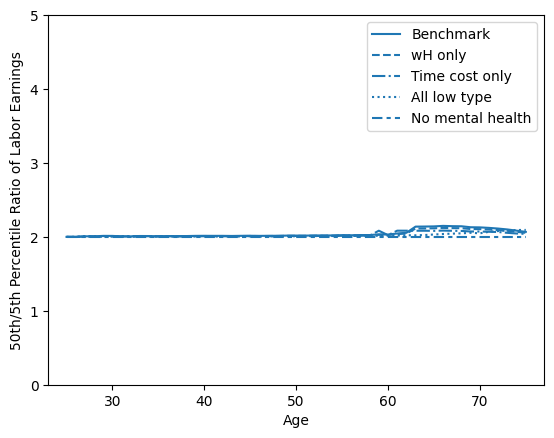

In [27]:
import plot_inequality as plot_ineq
import matplotlib
importlib.reload(tb)
importlib.reload(plot_ineq)

outpath = main_path + "validation/"
quietly = True
full_age_grid = True
y_label_root = "Labor Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
my_label_lists = [["Benchmark"], ["wH only"], ["Time cost only"], ["All low type"],["No mental health"]]

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench, sims_bench["lab_earnings"], y_axis_label_var, outpath, 
                                                                 quietly = quietly, full_age_grid = full_age_grid)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, sims_no_cost["lab_earnings"], y_axis_label_var, outpath, 
                                                             quietly = quietly, full_age_grid = full_age_grid)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH["lab_earnings"], y_axis_label_var, outpath, 
                                                         quietly = quietly, full_age_grid = full_age_grid)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_axis_label_var, outpath, 
                                                                               quietly = quietly, full_age_grid = full_age_grid)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, sims_no_MH["lab_earnings"], y_axis_label_var, outpath, 
                                                         quietly = quietly, full_age_grid = full_age_grid)

bench_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_bench, sims_bench["lab_earnings"], y_label_root, outpath, 
                                                          quietly = quietly, full_age_grid = full_age_grid)
no_cost_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_cost, sims_no_cost["lab_earnings"], y_label_root, outpath, 
                                                            quietly = quietly, full_age_grid = full_age_grid)
no_wH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_wH, sims_no_wH["lab_earnings"], y_label_root, outpath, 
                                                          quietly = quietly, full_age_grid = full_age_grid)
all_high_H_types_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_all_high_H_types, sims_all_high_H_types["lab_earnings"], y_label_root, outpath, 
                                                                     quietly = quietly, full_age_grid = full_age_grid)
no_MH_perc_plot_list = plot_ineq.plot_many_sim_perc_ratio(myPars_no_MH, sims_no_MH["lab_earnings"], y_label_root, outpath, 
                                                          quietly = quietly, full_age_grid = full_age_grid)

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
plot_save_path = outpath + "fig_earn_counter_var" + ".pdf"
combined_plot_list = []

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), 
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)], 
                    save_path = plot_save_path, label_lists = my_label_lists, quietly = False)
y_lim_percentile = [0.0, 5.0]

for i in range(len(bench_perc_plot_list)):
    plot_save_path = outpath + f"fig_earn_counter{i}.pdf"
    my_y_lim = None
    if i > 3:
        my_y_lim = y_lim_percentile
    combined_plot_list.append(tb.combine_plots([bench_perc_plot_list[i], 
                    no_cost_perc_plot_list[i], no_wH_perc_plot_list[i], 
                    all_high_H_types_perc_plot_list[i], no_MH_perc_plot_list[i]], 
                    save_path = plot_save_path, y_lim = my_y_lim, label_lists = my_label_lists, quietly = False))

plt.close("all")

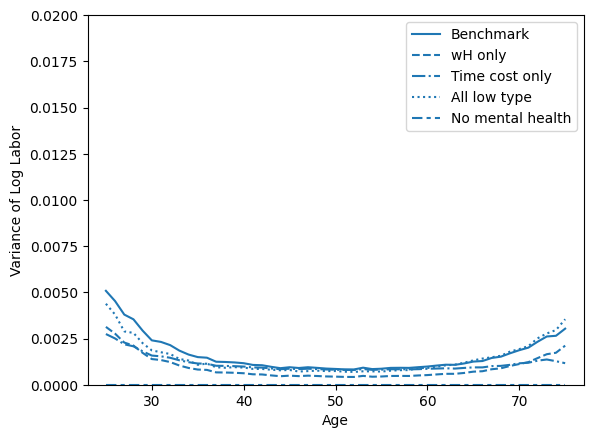

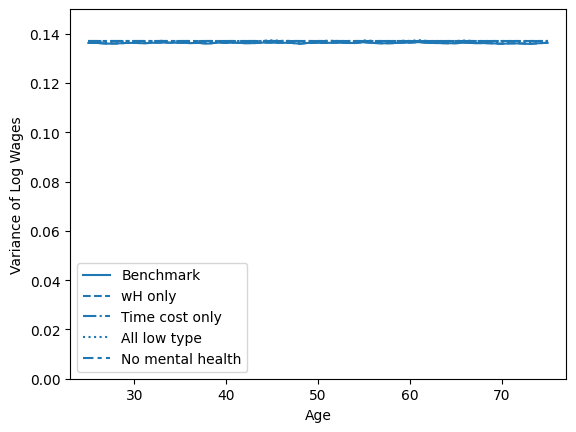

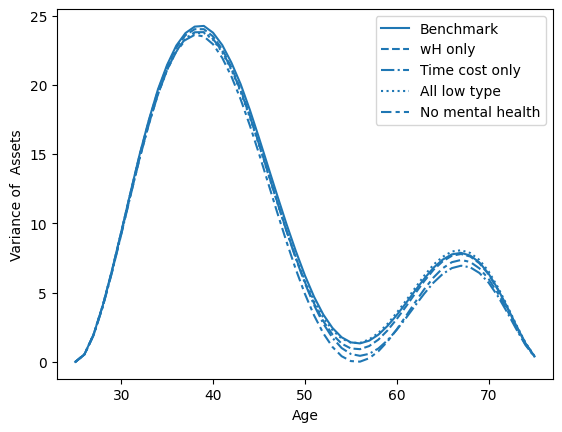

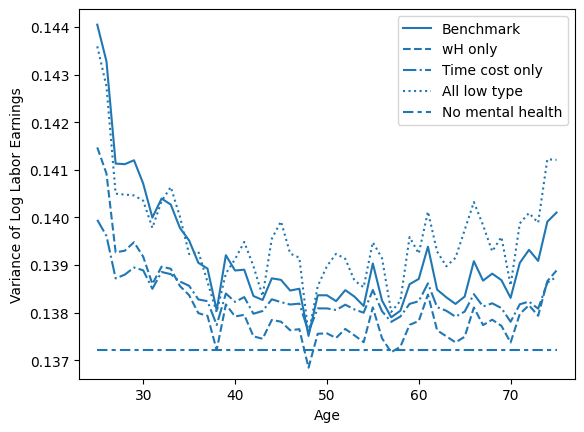

In [28]:
# gen the variance counter factual plot for log hours and log wages
import plot_inequality as plot_ineq
import matplotlib
importlib.reload(tb)
importlib.reload(plot_ineq)

outpath = main_path + "validation/"
quietly = True

my_label_lists = [["Benchmark"], ["wH only"], ["Time cost only"], ["All low type"],["No mental health"]]


y_label_root = "Labor"
y_axis_label_var = "Variance of Log" + " " + y_label_root
var = "lab"

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, sims_no_cost[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, sims_no_MH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_hours_counter_var" + ".pdf"
y_lim = [0.0, 0.02]

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), 
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)], 
                    y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

y_label_root = "Wages"
y_axis_label_var = "Variance of Log" + " " + y_label_root
y_lim = [0.0, 0.15]

wages_bench = model.gen_wage_hist(myPars_bench, myShocks_bench)
wages_no_cost = model.gen_wage_hist(myPars_no_cost, myShocks_no_cost)
wages_no_wH = model.gen_wage_hist(myPars_no_wH, myShocks_no_wH)
wages_all_high_H_types = model.gen_wage_hist(myPars_all_high_H_types, myShocks_all_high_H_types)
wages_no_MH = model.gen_wage_hist(myPars_no_MH, myShocks_no_MH)

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,wages_bench, y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, wages_no_cost, y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, wages_no_wH, y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, wages_all_high_H_types, y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, wages_no_MH, y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_wages_counter_var" + ".pdf"
fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark),
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)],
                  y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

var = "a"
y_label_root = "Assets"
y_axis_label_var = "Variance of " + " " + y_label_root

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_sim(myPars_no_cost, sims_no_cost[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_sim(myPars_no_MH, sims_no_MH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_assets_counter_var" + ".pdf"
y_lim = None 

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), 
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)], 
                    y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

y_label_root = "Labor Earnings"
y_axis_label_var = "Variance of Log" + " " + y_label_root
var = "lab_earnings"

fig_var_benchmark, ax_var_benchmark = plot_ineq.plot_var_log_sim(myPars_bench,sims_bench[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_cost, ax_var_no_cost = plot_ineq.plot_var_log_sim(myPars_no_cost, sims_no_cost[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_wH, ax_var_no_wH = plot_ineq.plot_var_log_sim(myPars_no_wH, sims_no_wH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_all_high_H_types, ax_var_all_high_H_types = plot_ineq.plot_var_log_sim(myPars_all_high_H_types, sims_all_high_H_types[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)
fig_var_no_MH, ax_var_no_MH = plot_ineq.plot_var_log_sim(myPars_no_MH, sims_no_MH[var], y_axis_label_var, outpath, quietly = quietly, full_age_grid=True)

plot_save_path = outpath + "fig_log_earn_counter_var" + ".pdf"
y_lim = None 

fig, ax = tb.combine_plots([(fig_var_benchmark, ax_var_benchmark), 
                  (fig_var_no_cost, ax_var_no_cost), (fig_var_no_wH, ax_var_no_wH), 
                  (fig_var_all_high_H_types, ax_var_all_high_H_types), (fig_var_no_MH, ax_var_no_MH)], 
                    y_lim = y_lim, save_path = plot_save_path, label_lists = my_label_lists, quietly = False)

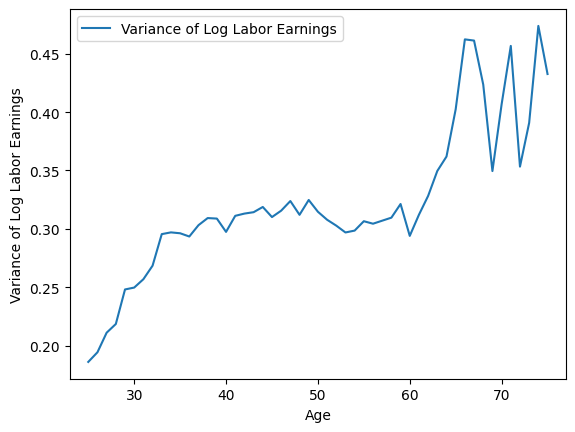

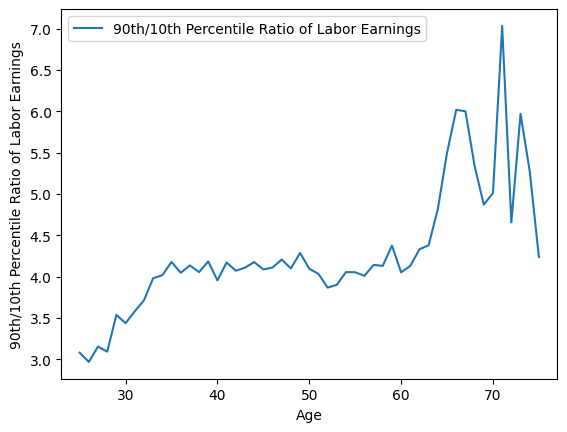

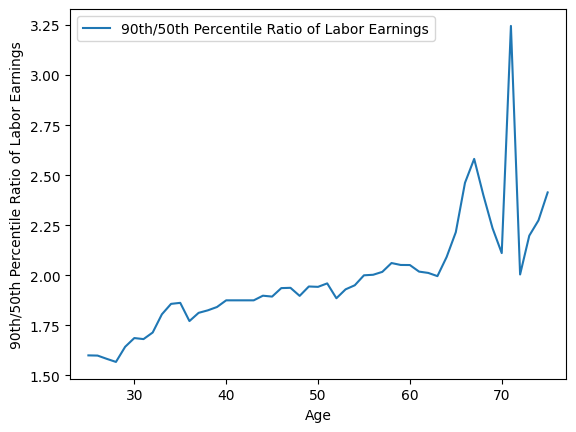

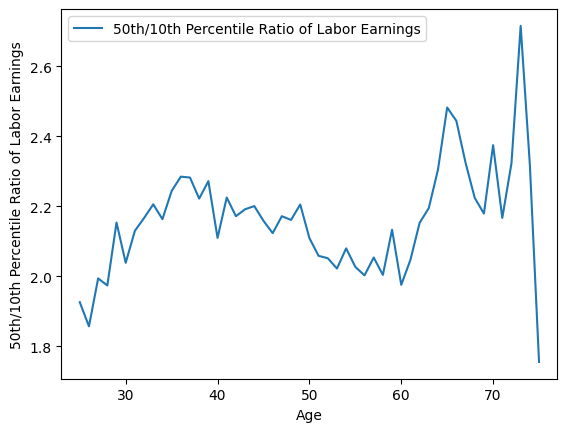

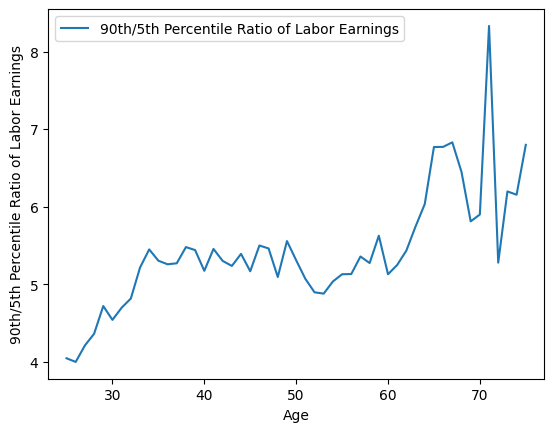

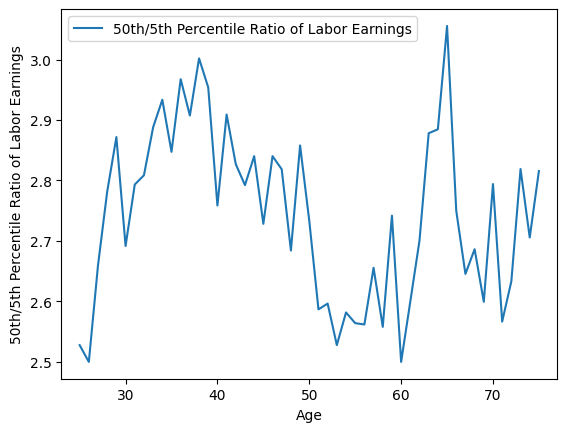

In [29]:
input_path = main_path + "input/50p_age_moms/"
plot_save_path = main_path + "validation/" + "validating_var_earn" + ".pdf"
quietly = False

var_earns_data = tb.read_specific_column_from_csv(input_path + "var_earn_moments.csv", 1)
earns_data_5p = tb.read_specific_column_from_csv(input_path + "earn_percentiles.csv", 1, row_index = 2)
earns_data_10p = tb.read_specific_column_from_csv(input_path + "earn_percentiles.csv", 2, row_index = 2)
earns_data_50p = tb.read_specific_column_from_csv(input_path + "earn_percentiles.csv", 3, row_index = 2)
earns_data_90p = tb.read_specific_column_from_csv(input_path + "earn_percentiles.csv", 4, row_index = 2)
earns_data_95p = tb.read_specific_column_from_csv(input_path + "earn_percentiles.csv", 5, row_index = 2)
earns_data_90_10 = earns_data_90p/earns_data_10p
earns_data_90_50 = earns_data_90p/earns_data_50p
earns_data_50_10 = earns_data_50p/earns_data_10p
earns_data_90_5 = earns_data_90p/earns_data_5p
earns_data_50_5 = earns_data_50p/earns_data_5p

# my_age_grid = myPars_bench.age_grid[:31] # only want to plot up to age 55
my_age_grid = myPars_bench.age_grid

fig_var_earns_data, ax_var_earns_data =tb.plot_lc_mom_by_age(var_earns_data, my_age_grid,  
                                                             mom_name = "Variance of Log Labor Earnings" , 
                                                             quietly = quietly)
fig_earns_data_90_10, ax_earns_data_90_10 = tb.plot_lc_mom_by_age(earns_data_90_10, my_age_grid,  
                                                                 mom_name = "90th/10th Percentile Ratio of Labor Earnings",
                                                                   quietly = quietly)
fig_earns_data_90_50, ax_earns_data_90_50 = tb.plot_lc_mom_by_age(earns_data_90_50, my_age_grid, 
                                                                    mom_name = "90th/50th Percentile Ratio of Labor Earnings",
                                                                    quietly = quietly)
fig_earns_data_50_10, ax_earns_data_50_10 = tb.plot_lc_mom_by_age(earns_data_50_10, my_age_grid, 
                                                                    mom_name = "50th/10th Percentile Ratio of Labor Earnings",
                                                                    quietly = quietly)
fig_earns_data_90_5, ax_earns_data_90_5 = tb.plot_lc_mom_by_age(earns_data_90_5, my_age_grid, 
                                                                mom_name = "90th/5th Percentile Ratio of Labor Earnings",
                                                                quietly = quietly)
fig_earns_data_50_5, ax_earns_data_50_5 = tb.plot_lc_mom_by_age(earns_data_50_5, my_age_grid, 
                                                                mom_name = "50th/5th Percentile Ratio of Labor Earnings",
                                                                quietly = quietly)


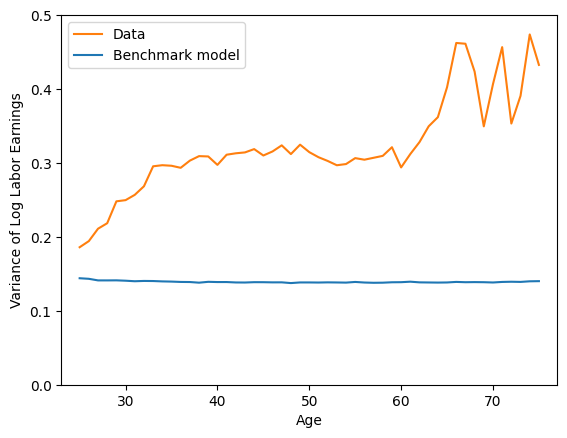

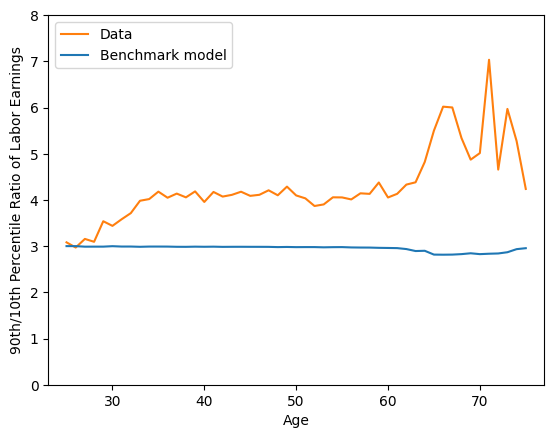

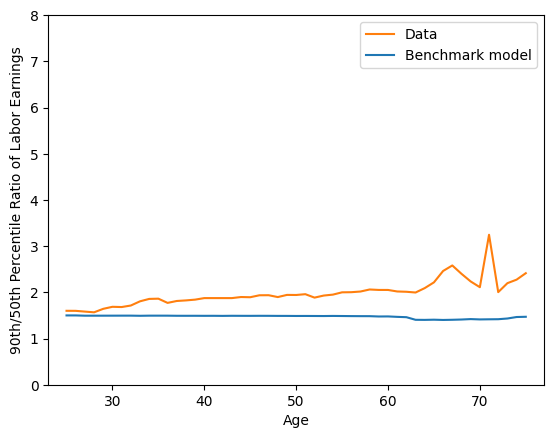

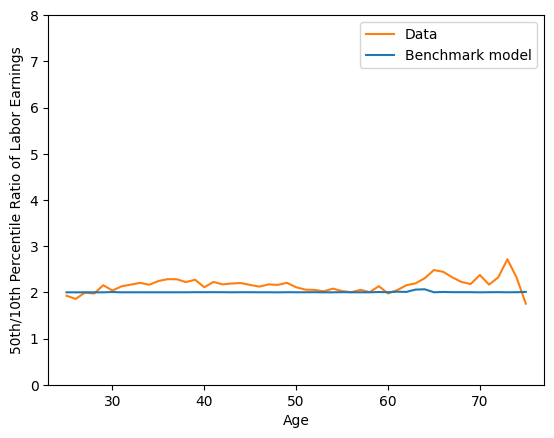

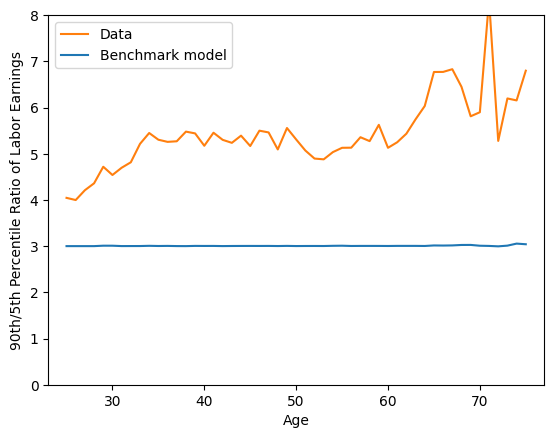

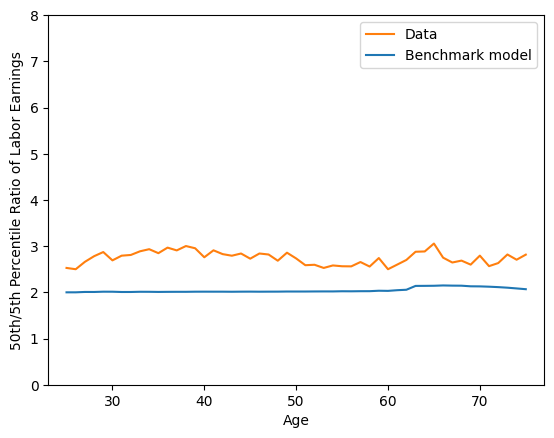

In [32]:
importlib.reload(tb)
plt.ioff()
quietly = False
label_lists = [["Data"], ["Benchmark model"]]
percentile_y_lim = [0.0, 8.0]
line_colors = ["C1", "C0"] # these are the standard matplotlib colors
plot_save_path = main_path + "validation/" + "validating_earn" 

fig_valid_lab_earn, ax_valid_lab_earn = tb.combine_plots([(fig_var_earns_data, ax_var_earns_data), 
                                                            (fig_var_benchmark, ax_var_benchmark)],
                                                            save_path = plot_save_path + "_var" + ".pdf", y_lim = [0.0, 0.5],
                                                            label_lists = label_lists, colors = line_colors, quietly = quietly)

fig_valid_lab_earn_90_10, ax_valid_lab_earn_90_10 = tb.combine_plots([(fig_earns_data_90_10, ax_earns_data_90_10),
                                                                    bench_perc_plot_list[4]], 
                                                                    save_path = plot_save_path + "_90_10" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists, 
                                                                    colors = line_colors, quietly = quietly)

fig_valid_lab_earn_90_50, ax_valid_lab_earn_90_50 = tb.combine_plots([(fig_earns_data_90_50, ax_earns_data_90_50),
                                                                    bench_perc_plot_list[5]],
                                                                    save_path = plot_save_path + "_90_50" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists, 
                                                                    colors = line_colors, quietly = quietly)

fig_valid_lab_earn_50_10, ax_valid_lab_earn_50_10 = tb.combine_plots([(fig_earns_data_50_10, ax_earns_data_50_10),
                                                                    bench_perc_plot_list[6]],
                                                                    save_path = plot_save_path + "_50_10" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists,
                                                                    colors = line_colors, quietly = quietly)

fig_valid_lab_earn_90_5, ax_valid_lab_earn_90_5 = tb.combine_plots([(fig_earns_data_90_5, ax_earns_data_90_5),
                                                                    bench_perc_plot_list[7]],
                                                                    save_path = plot_save_path + "_90_5" + ".pdf",
                                                                    y_lim = percentile_y_lim,label_lists = label_lists,     
                                                                    colors = line_colors, quietly = quietly)

fig_valid_lab_earn_50_5, ax_valid_lab_earn_50_5 = tb.combine_plots([(fig_earns_data_50_5, ax_earns_data_50_5),
                                                                    bench_perc_plot_list[8]],
                                                                    save_path = plot_save_path + "_50_5" + ".pdf",
                                                                    y_lim = percentile_y_lim, label_lists = label_lists,
                                                                    colors = line_colors, quietly = quietly)

In [16]:

def weight_devs2(myPars: Pars, devs2: np.ndarray) -> np.ndarray:
    wdevs = devs2 * (1.0/myPars.sim_draws)
    wdevs = wdevs * myPars.H_type_perm_weights[np.newaxis, :, np.newaxis]
    wdevs = wdevs *  myPars.lab_fe_weights[:, np.newaxis, np.newaxis]
    return wdevs